In [101]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [102]:
sns.set_style('whitegrid')

In [103]:
# warning 숨기기
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 문제 해결
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [104]:
df = pd.read_csv("../Data/seoul.csv")
df

,시군구,년도,전입인구,전출인구,등록외국인,주민등록인구,출생아수,산부인과의원수,소아청소년과의원수,문화기반시설수
0,종로구,2013,24676,30007,7797,160070,873,9,4,57
1,종로구,2014,24191,27484,8351,156993,905,9,4,59
2,종로구,2015,24951,27470,8836,154986,906,9,4,61
3,종로구,2016,23604,26386,9185,152737,846,9,4,64
4,종로구,2017,28020,25814,9487,154770,689,9,4,64
...,...,...,...,...,...,...,...,...,...,...
220,강동구,2017,81615,90819,4136,436223,2968,18,23,10
221,강동구,2018,59334,68933,4347,427573,2659,17,24,12
222,강동구,2019,75101,67292,4323,436067,2437,17,26,12
223,강동구,2020,101437,78271,4028,459970,2535,17,25,13


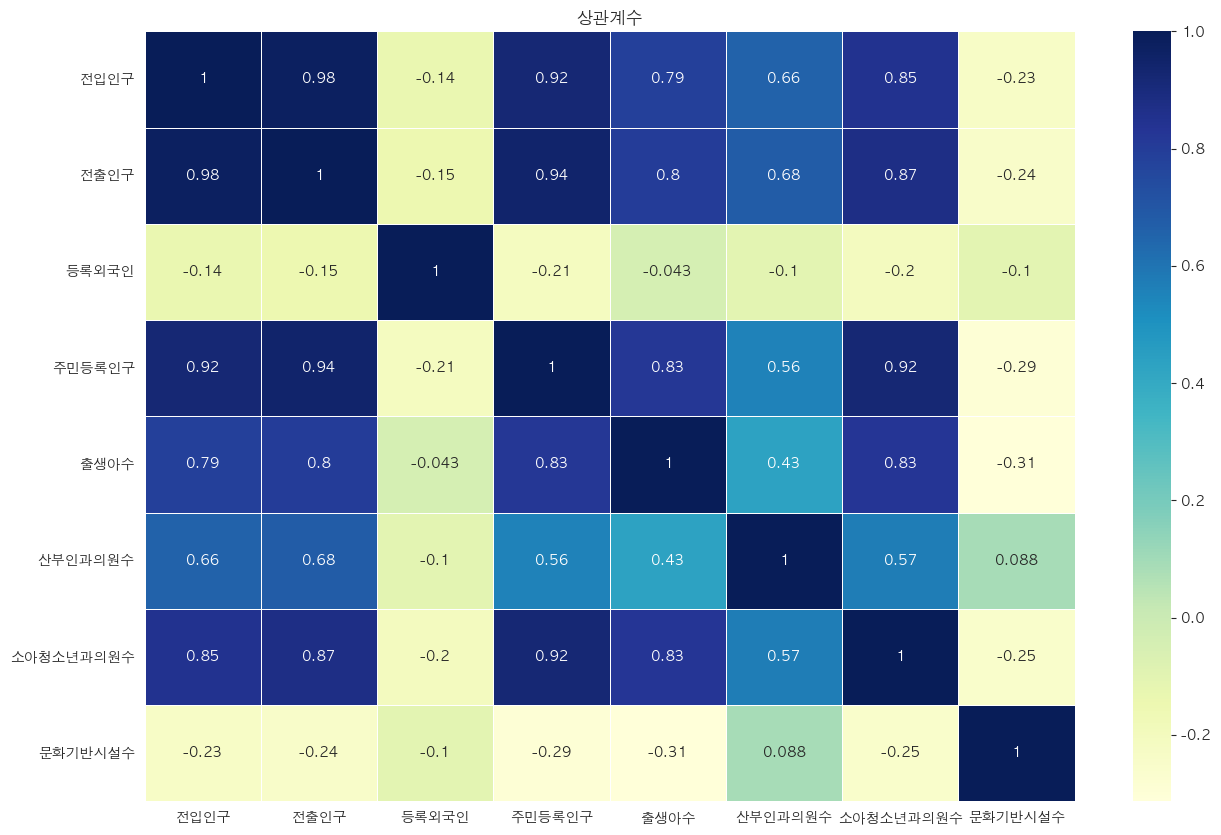

In [105]:
target_col = ['전입인구','전출인구','등록외국인','주민등록인구','출생아수','산부인과의원수','소아청소년과의원수','문화기반시설수']
plt.figure(figsize=(15,10))
sns.heatmap(
    df[target_col].corr(),
    annot = True, # True로 해야 숫자가 보임
    # fmt = 'f', # 실수
    cmap='YlGnBu',
    linewidth = 0.5
)
plt.title('상관계수')
# plt.xticks(rotation=15)
plt.show()

In [106]:
target_col = ['전입인구','전출인구','등록외국인','주민등록인구','출생아수','산부인과의원수','소아청소년과의원수','문화기반시설수']

df[target_col]

,전입인구,전출인구,등록외국인,주민등록인구,출생아수,산부인과의원수,소아청소년과의원수,문화기반시설수
0,24676,30007,7797,160070,873,9,4,57
1,24191,27484,8351,156993,905,9,4,59
2,24951,27470,8836,154986,906,9,4,61
3,23604,26386,9185,152737,846,9,4,64
4,28020,25814,9487,154770,689,9,4,64
...,...,...,...,...,...,...,...,...
220,81615,90819,4136,436223,2968,18,23,10
221,59334,68933,4347,427573,2659,17,24,12
222,75101,67292,4323,436067,2437,17,26,12
223,101437,78271,4028,459970,2535,17,25,13


<Figure size 2500x1500 with 0 Axes>

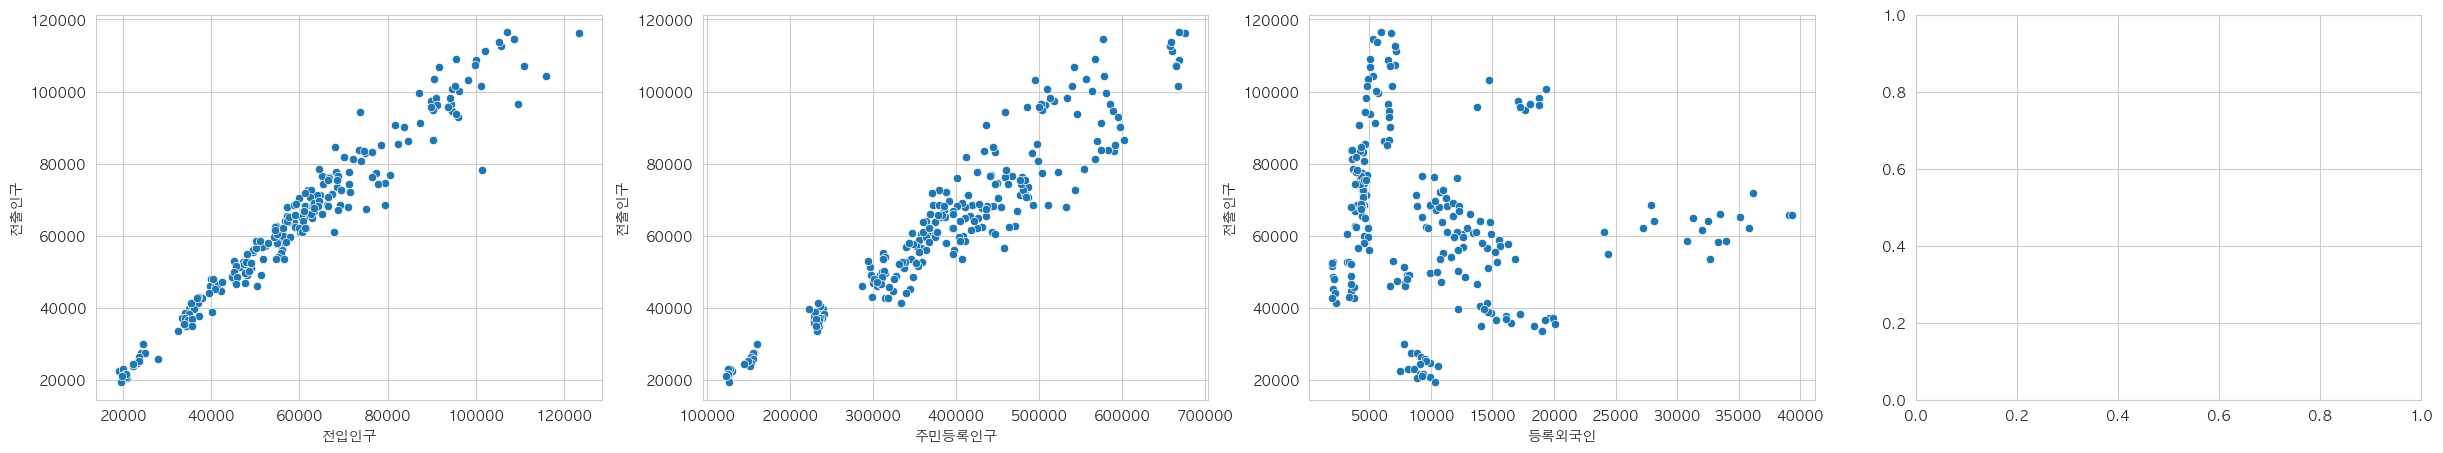

In [107]:
plt.figure(figsize=(25,15))
fig, ax = plt.subplots(ncols=4,figsize=(30,5))
sns.scatterplot(x="전입인구", y="전출인구", data=df, ax=ax[0])
sns.scatterplot(x="주민등록인구", y="전출인구", data=df, ax=ax[1])
sns.scatterplot(x="등록외국인", y="전출인구", data=df, ax=ax[2])
# sns.scatterplot(x="산부인과의원수", y="전출인구", data=df, ax=ax[3])
plt.show()

<Figure size 2500x1500 with 0 Axes>

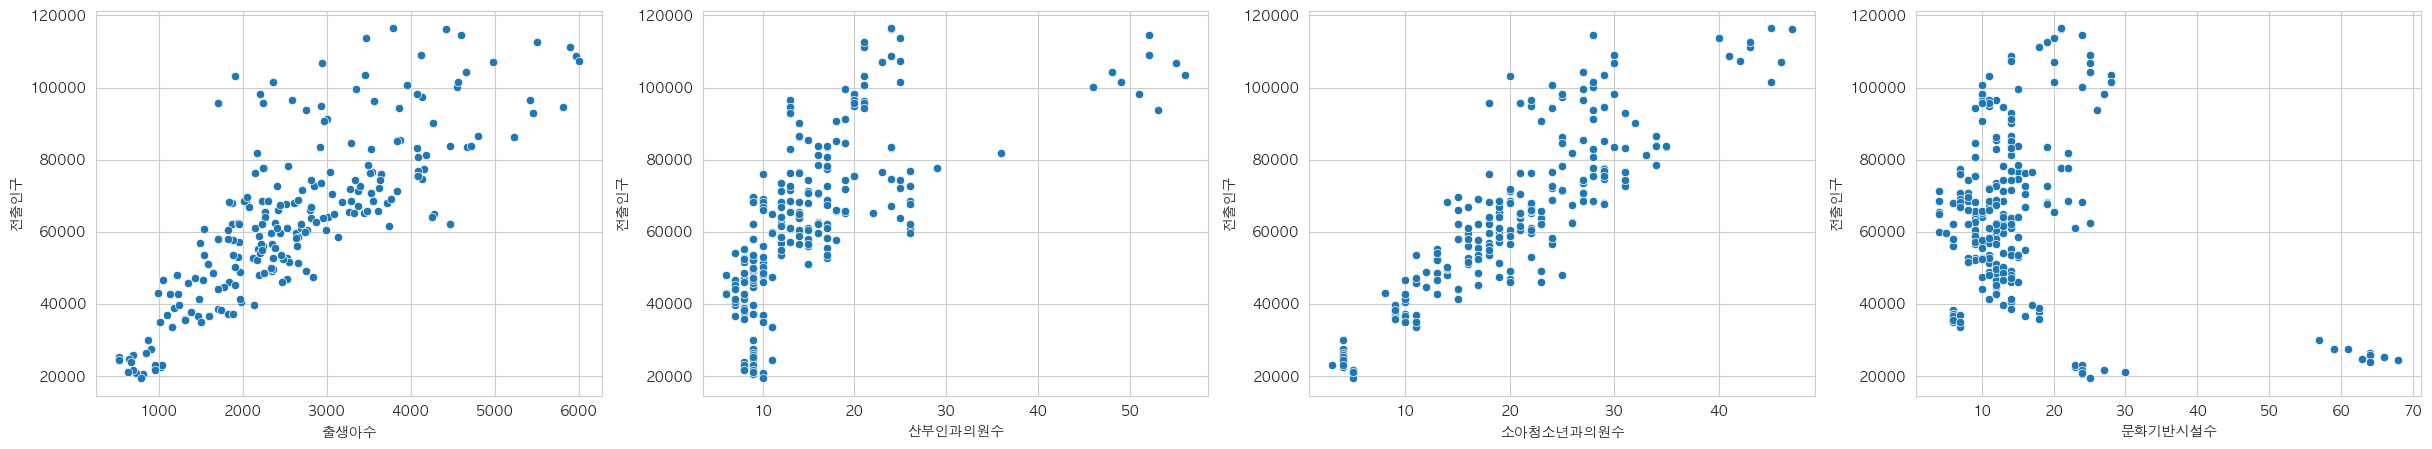

In [108]:
plt.figure(figsize=(25,15))
fig, ax = plt.subplots(ncols=4,figsize=(30,5))
sns.scatterplot(x="출생아수", y="전출인구", data=df, ax=ax[0])
sns.scatterplot(x="산부인과의원수", y="전출인구", data=df, ax=ax[1])
sns.scatterplot(x="소아청소년과의원수", y="전출인구", data=df, ax=ax[2])
sns.scatterplot(x="문화기반시설수", y="전출인구", data=df, ax=ax[3])
plt.show()

In [109]:
# # 총 인구, 남성 인구, 여성 인구, 주택수, 빈집수, 자동차등록대수, 전입인구, 전출인구에 대한 상관관계 시각화
# target_col = ['전입인구','전출인구','등록외국인','주민등록인구','출생아수','산부인과의원수','소아청소년과의원수','문화기반시설수']
# sns.pairplot(
#     df,
#     vars = target_col,
#     # kind = 'reg'
# )
# plt.show()

In [110]:
# # 총 인구, 남성 인구, 여성 인구, 주택수, 빈집수, 자동차등록대수, 전입인구, 전출인구에 대한 상관관계 시각화
# target_col = ['전입인구','전출인구','등록외국인','주민등록인구','출생아수','산부인과의원수','소아청소년과의원수','문화기반시설수']
# sns.pairplot(
#     df.loc[:,target_col],
#     vars = target_col,
#     kind = 'reg'
# )
# plt.show()

In [113]:
# 조인트 그래프 - 산점도 (기본값)
def jointplotFun(a, b):    
    j1 = sns.jointplot(
        x=df[a]/1000,
        y=df[b]/1000,
        data=df,
        # hue="cluster_id",
        legend=True,
        palette='rainbow',
        s=200,
        alpha=0.6,
        # height=10, 
    )
    plt.xlabel(f"{a}(단위: 1000명)")
    plt.ylabel(f"{b}(단위: 1000명)")

    j1.fig.suptitle(f'{a}-{b} 산포도', size=15)
    plt.legend(loc='right')
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


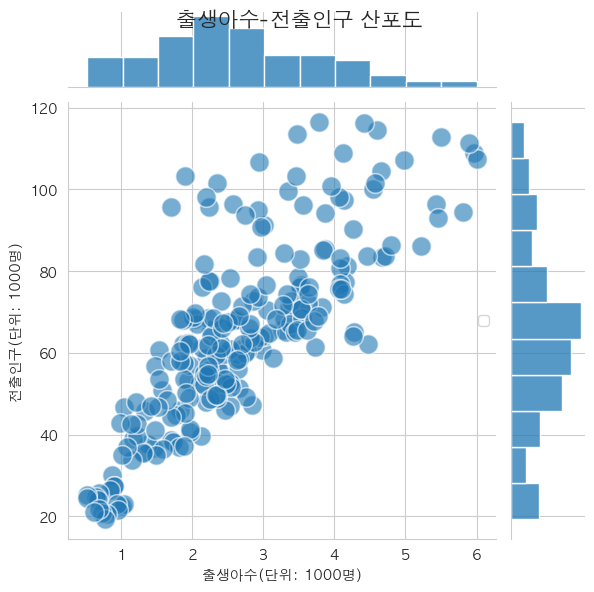

In [114]:
jointplotFun('출생아수', '전출인구')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


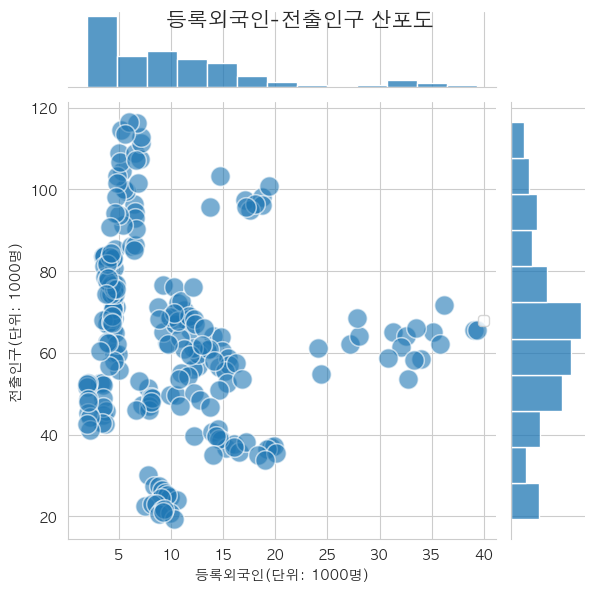

In [115]:
jointplotFun('등록외국인', '전출인구')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


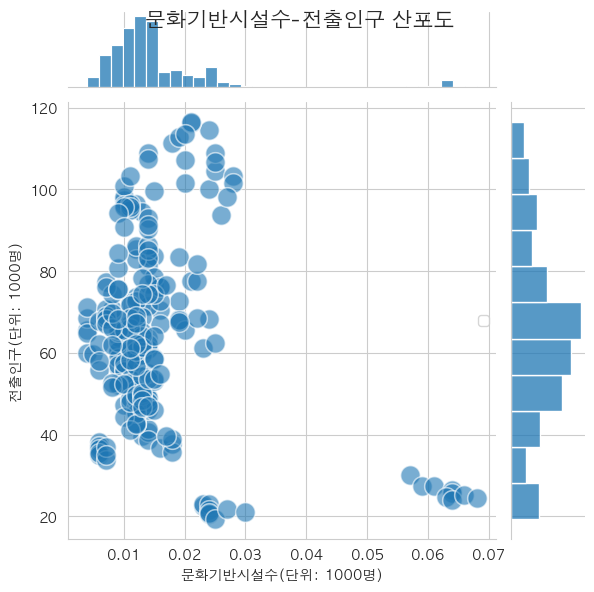

In [116]:
jointplotFun('문화기반시설수', '전출인구')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


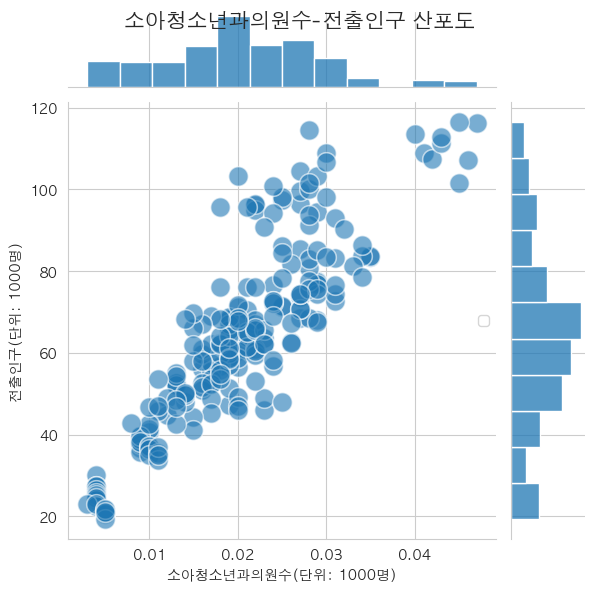

In [117]:
jointplotFun('소아청소년과의원수', '전출인구')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


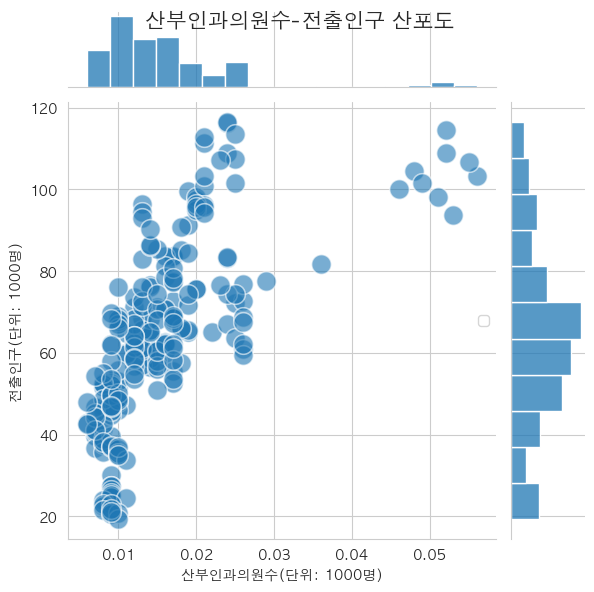

In [118]:
jointplotFun('산부인과의원수', '전출인구')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


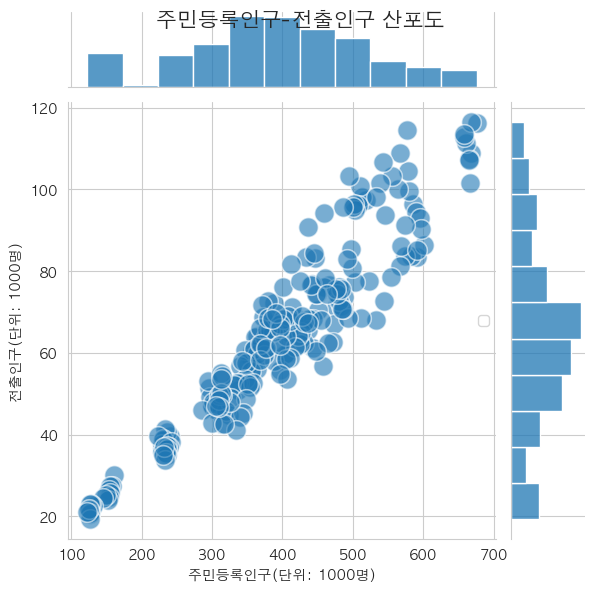

In [119]:
jointplotFun('주민등록인구', '전출인구')

In [120]:
df

,시군구,년도,전입인구,전출인구,등록외국인,주민등록인구,출생아수,산부인과의원수,소아청소년과의원수,문화기반시설수
0,종로구,2013,24676,30007,7797,160070,873,9,4,57
1,종로구,2014,24191,27484,8351,156993,905,9,4,59
2,종로구,2015,24951,27470,8836,154986,906,9,4,61
3,종로구,2016,23604,26386,9185,152737,846,9,4,64
4,종로구,2017,28020,25814,9487,154770,689,9,4,64
...,...,...,...,...,...,...,...,...,...,...
220,강동구,2017,81615,90819,4136,436223,2968,18,23,10
221,강동구,2018,59334,68933,4347,427573,2659,17,24,12
222,강동구,2019,75101,67292,4323,436067,2437,17,26,12
223,강동구,2020,101437,78271,4028,459970,2535,17,25,13


----
# 컬럼 삭제

In [122]:
df = df.drop(columns=['전입인구', '등록외국인', '주민등록인구', '소아청소년과의원수', '문화기반시설수'])
df

,시군구,년도,전출인구,출생아수,산부인과의원수
0,종로구,2013,30007,873,9
1,종로구,2014,27484,905,9
2,종로구,2015,27470,906,9
3,종로구,2016,26386,846,9
4,종로구,2017,25814,689,9
...,...,...,...,...,...
220,강동구,2017,90819,2968,18
221,강동구,2018,68933,2659,17
222,강동구,2019,67292,2437,17
223,강동구,2020,78271,2535,17


## k값 찾기

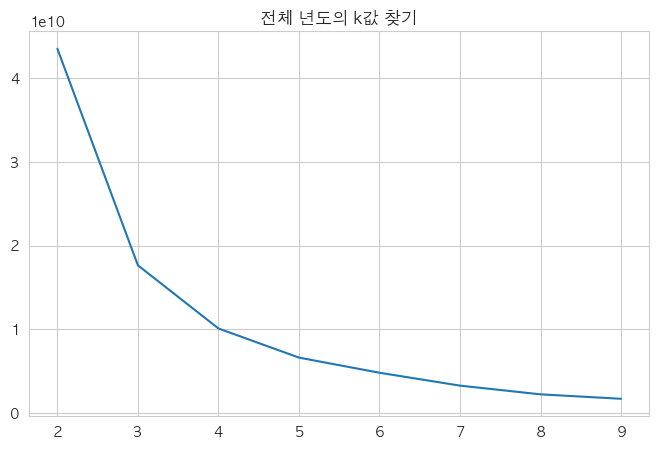

In [134]:
# target_col = ['전입인구','전출인구','등록외국인','주민등록인구','출생아수','산부인과의원수','소아청소년과의원수','문화기반시설수']
target_col = ['전출인구','출생아수','산부인과의원수']

df_temp = df.copy()
# df_km = df_temp[df_temp.columns.difference(['총인구'])] # 총인구 컬럼이 존재할 때 사용한 것임
# k값 찾기 --------------------------------------------
scores = []
for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df_temp[target_col])
    scores.append(km.inertia_)
# 그래프 그리기 ------------------
plt.figure(figsize=(8,5))
plt.plot(range(2,10), scores)
plt.title('전체 년도의 k값 찾기')
plt.show()
# -----------------------------

In [129]:
df[target_col]

,전출인구,출생아수,산부인과의원수
0,30007,873,9
1,27484,905,9
2,27470,906,9
3,26386,846,9
4,25814,689,9
...,...,...,...
220,90819,2968,18
221,68933,2659,17
222,67292,2437,17
223,78271,2535,17


In [130]:
# 일자와 관련된 컬럼을 제외하고 data의 크기 비교
# target_col = ['전입인구','전출인구','등록외국인','주민등록인구','출생아수','산부인과의원수','소아청소년과의원수','문화기반시설수']
df[target_col].describe()

,전출인구,출생아수,산부인과의원수
count,225.000000,225.000000,225.000000
mean,64130.928889,2650.800000,15.640000
std,22464.759983,1176.254494,9.191378
min,19384.000000,528.000000,6.000000
25%,49012.000000,1884.000000,9.000000
50%,63689.000000,2481.000000,14.000000
75%,76521.000000,3456.000000,18.000000
max,116457.000000,6001.000000,56.000000


In [131]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [135]:
dfScaled = scaler.fit_transform(df[target_col])
dfScaled = pd.DataFrame(dfScaled)
dfScaled.columns = target_col
dfScaled

,전출인구,출생아수,산부인과의원수
0,0.109433,0.063037,0.06
1,0.083442,0.068884,0.06
2,0.083298,0.069066,0.06
3,0.072131,0.058103,0.06
4,0.066239,0.029417,0.06
...,...,...,...
220,0.735889,0.445825,0.24
221,0.510430,0.389366,0.22
222,0.493525,0.348803,0.22
223,0.606626,0.366709,0.22


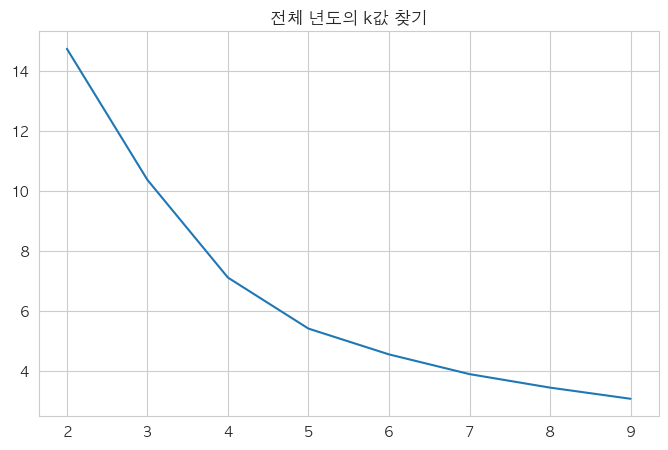

In [136]:
# target_col = ['전입인구','전출인구','등록외국인','주민등록인구','출생아수','산부인과의원수','소아청소년과의원수','문화기반시설수']

df_temp = dfScaled.copy()
# df_km = df_temp[df_temp.columns.difference(['총인구'])] # 총인구 컬럼이 존재할 때 사용한 것임
# k값 찾기 --------------------------------------------
scores = []
for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df_temp[target_col])
    scores.append(km.inertia_)
# 그래프 그리기 ------------------
plt.figure(figsize=(8,5))
plt.plot(range(2,10), scores)
plt.title('전체 년도의 k값 찾기')
plt.show()
# -----------------------------

# K 적용하여 분류

In [137]:
# target_col = ['전입인구','전출인구','등록외국인','주민등록인구','출생아수','산부인과의원수','소아청소년과의원수','문화기반시설수']
target_col = ['전출인구','출생아수','산부인과의원수']

data_points = df[target_col].values
km = KMeans(n_clusters=4).fit(data_points) # n_clusters 에 값을 정해주기!

# labels
print(km.labels_)
# 각 군집의 중심위치
km.cluster_centers_

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 1 1 1
 1 1 1 1 2 1 2 1 1 1 1 1 1 2 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 1 1 0 0 0 0 1 1 1 0 1 0 0 0 0 1 1 1 0 1 0 3 3 3 0 3 0 3 3 1 0 1 1
 1 1 1 1 1 2 2 2 2 2 2 2 2 2 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 3 3 3 3 3
 3 3 3 3 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 3 0 3 0
 0 0 0]


array([[7.32682192e+04, 3.23182192e+03, 1.69589041e+01],
       [5.52224805e+04, 2.29288312e+03, 1.22987013e+01],
       [3.18241750e+04, 1.16250000e+03, 8.65000000e+00],
       [1.01593743e+05, 3.92728571e+03, 2.82285714e+01]])

In [138]:
# 데이터가 어느 군집에 소속되어 있는지 정하기
df['cluster_id'] = km.labels_
df

,시군구,년도,전출인구,출생아수,산부인과의원수,cluster_id
0,종로구,2013,30007,873,9,2
1,종로구,2014,27484,905,9,2
2,종로구,2015,27470,906,9,2
3,종로구,2016,26386,846,9,2
4,종로구,2017,25814,689,9,2
...,...,...,...,...,...,...
220,강동구,2017,90819,2968,18,3
221,강동구,2018,68933,2659,17,0
222,강동구,2019,67292,2437,17,0
223,강동구,2020,78271,2535,17,0


In [139]:
# 조인트 그래프 - 산점도 (기본값)
def jointplotFun(a, b):    
    j1 = sns.jointplot(
        x=df[a]/1000,
        y=df[b]/1000,
        data=df,
        hue="cluster_id",
        legend=True,
        palette='rainbow',
        s=200,
        alpha=0.6,
        # height=10, 
    )
    plt.xlabel(f"{a}(단위: 1000명)")
    plt.ylabel(f"{b}(단위: 1000명)")

    j1.fig.suptitle(f'{a}-{b} 산포도', size=15)
    plt.legend(loc='right')
    plt.show()

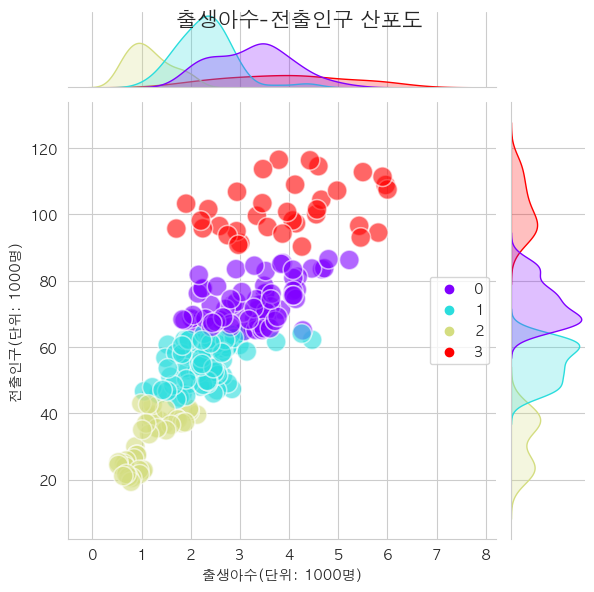

In [140]:
jointplotFun('출생아수', '전출인구')

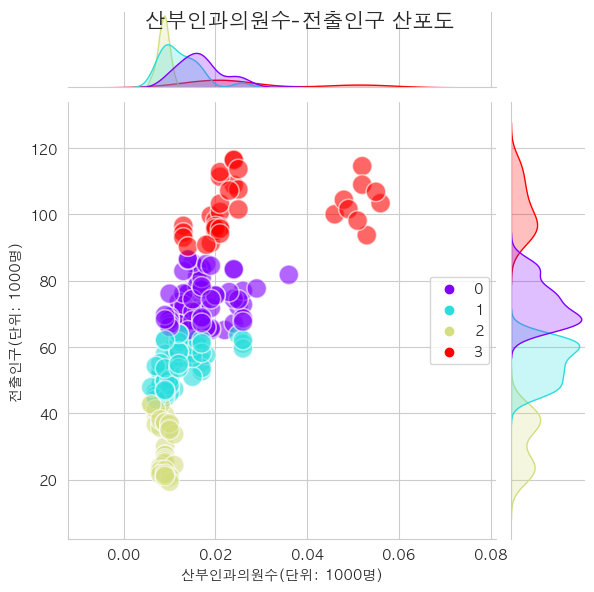

In [142]:
jointplotFun('산부인과의원수', '전출인구')

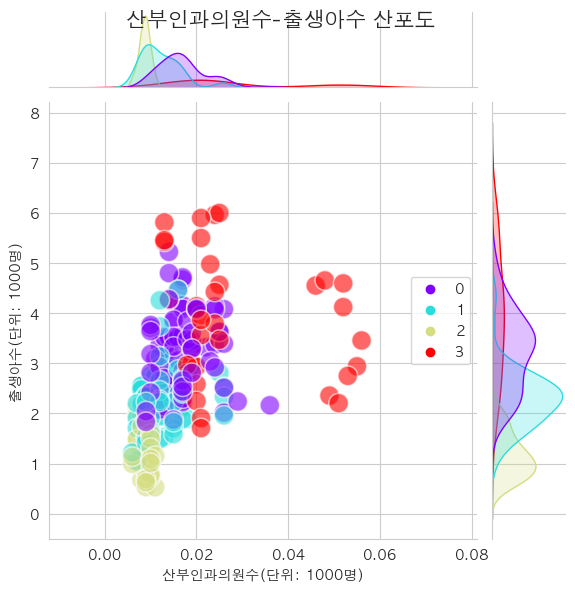

In [143]:
jointplotFun('산부인과의원수', '출생아수')

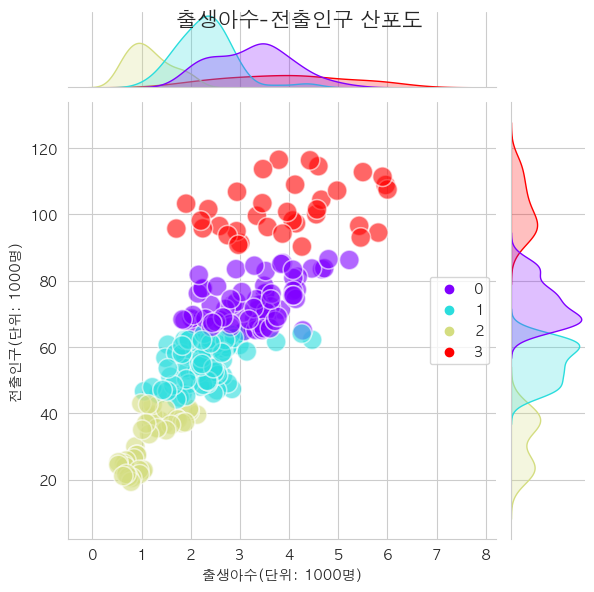

In [144]:
# 조인트 그래프 - 산점도 (기본값)
j1 = sns.jointplot(
    x=df['출생아수']/1000,
    y=df['전출인구']/1000,
    data=df,
    hue="cluster_id",
    legend=True,
    palette='rainbow',
    s=200,
    alpha=0.6,
    # height=10, 
)
plt.xlabel("출생아수(단위: 1000명)")
plt.ylabel("전출인구(단위: 1000명)")

j1.fig.suptitle('출생아수-전출인구 산포도', size=15)
plt.legend(loc='right')
plt.show()

In [145]:
df

,시군구,년도,전출인구,출생아수,산부인과의원수,cluster_id
0,종로구,2013,30007,873,9,2
1,종로구,2014,27484,905,9,2
2,종로구,2015,27470,906,9,2
3,종로구,2016,26386,846,9,2
4,종로구,2017,25814,689,9,2
...,...,...,...,...,...,...
220,강동구,2017,90819,2968,18,3
221,강동구,2018,68933,2659,17,0
222,강동구,2019,67292,2437,17,0
223,강동구,2020,78271,2535,17,0


----
# Classification

In [146]:
# Feature, Target
target_col = ['전출인구','출생아수','산부인과의원수']

data = df[target_col].to_numpy()
target = df['cluster_id'].to_numpy()

### 검증 세트 추가
- 훈련(60%), 검증(20%), 테스트(20%)

In [147]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = \
    train_test_split(data, target, test_size=0.2, stratify=target) # , random_state=42

In [148]:
sub_input, val_input, sub_target, val_target = \
    train_test_split(train_input, train_target, test_size=0.2, stratify=train_target) # , random_state=42

In [149]:
# 세트 별 크기
print("Train :", sub_input.shape)
print("Valid :", val_input.shape)
print("Test  :", test_input.shape)

Train : (144, 3)
Valid : (36, 3)
Test  : (45, 3)


In [150]:
# 모델 tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(sub_input, sub_target)

print("Train score :", dt.score(sub_input, sub_target))
print("Valid score :", dt.score(val_input, val_target))

Train score : 1.0
Valid score : 1.0


In [151]:
# 각 ML별 import
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# 교차검증 import
from sklearn.model_selection import cross_validate

ml_list = [KNeighborsClassifier(n_neighbors=3), SVC(), GaussianProcessClassifier(), DecisionTreeClassifier(), RandomForestClassifier(), AdaBoostClassifier(), MLPClassifier(), GaussianNB(), QuadraticDiscriminantAnalysis()]
for ml in ml_list:
    print("- ML :", ml)
    clf = ml
    # 학습
    clf.fit(sub_input, sub_target)
    # 정확도 판단
    print("+ Train score :", clf.score(sub_input, sub_target))
    print("+ Valid score :", clf.score(val_input, val_target))
    # 교차검증
    scores = cross_validate(clf, train_input, train_target)
    # 교차검증 후의 정확도 판단
    print("+ Test score :", np.mean(scores['test_score']))
    print("-"*30)

- ML : KNeighborsClassifier(n_neighbors=3)
+ Train score : 1.0
+ Valid score : 1.0
+ Test score : 0.9944444444444445
------------------------------
- ML : SVC()
+ Train score : 0.9722222222222222
+ Valid score : 0.9444444444444444
+ Test score : 0.9722222222222223
------------------------------
- ML : GaussianProcessClassifier()
+ Train score : 1.0
+ Valid score : 0.16666666666666666
+ Test score : 0.15555555555555553
------------------------------
- ML : DecisionTreeClassifier()
+ Train score : 1.0
+ Valid score : 1.0
+ Test score : 1.0
------------------------------
- ML : RandomForestClassifier()
+ Train score : 1.0
+ Valid score : 1.0
+ Test score : 1.0
------------------------------
- ML : AdaBoostClassifier()
+ Train score : 1.0
+ Valid score : 1.0
+ Test score : 1.0
------------------------------
- ML : MLPClassifier()
+ Train score : 0.3194444444444444
+ Valid score : 0.3333333333333333
+ Test score : 0.24444444444444446
------------------------------
- ML : GaussianNB()
+ Trai

----
### KFold를 이용한 방법

In [152]:
from sklearn.model_selection import cross_validate

In [153]:
from sklearn.model_selection import StratifiedKFold
splitter = StratifiedKFold() # default : 5
scores = cross_validate(dt, train_input, train_target, cv=splitter)
scores

{'fit_time': array([0.00135875, 0.00053   , 0.00051093, 0.00052094, 0.00044107]),
 'score_time': array([0.00029707, 0.00019503, 0.0003531 , 0.00018883, 0.00016999]),
 'test_score': array([1., 1., 1., 1., 1.])}

In [154]:
np.mean(scores['test_score'])

1.0

In [155]:
# KFold의 Fold 중 10개로 나누어서 교차검증
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42) # default : 5
scores = cross_validate(dt, train_input, train_target, cv=splitter)
scores

{'fit_time': array([0.00061584, 0.00046897, 0.00038314, 0.00035   , 0.00031519,
        0.00033092, 0.0003078 , 0.00031686, 0.00032711, 0.00034404]),
 'score_time': array([0.00021887, 0.00016308, 0.00015187, 0.00013185, 0.00012803,
        0.00013018, 0.00012493, 0.00012803, 0.00013685, 0.00013208]),
 'test_score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])}

In [156]:
np.mean(scores['test_score'])

1.0

----
----
# Regression
1. cluster_id : [0, 1, 2, 3] -> [0 ~ 1] 변환
2. Regression 진행

In [157]:
df['cluster_id'] = df['cluster_id'] + 10
df_temp = df.sort_values(by='전출인구', ascending=True)
temp_list = df_temp['cluster_id'].unique()

i = 3
for temp in temp_list:
    df['cluster_id'][df['cluster_id'] == temp] = i
    i-=1
df['cluster_id'] = np.round(df['cluster_id'] / 3, 2)
df['cluster_id'].unique()

array([1.  , 0.67, 0.33, 0.  ])

In [158]:
# 조인트 그래프 - 산점도 (기본값)
def jointplotFun(a, b):    
    j1 = sns.jointplot(
        x=df[a]/1000,
        y=df[b]/1000,
        data=df,
        hue="cluster_id",
        legend=True,
        palette='rainbow',
        s=200,
        alpha=0.6,
        # height=10, 
    )
    plt.xlabel(f"{a}(단위: 1000명)")
    plt.ylabel(f"{b}(단위: 1000명)")

    j1.fig.suptitle(f'{a}-{b} 산포도', size=15)
    plt.legend(loc='right')
    plt.show()

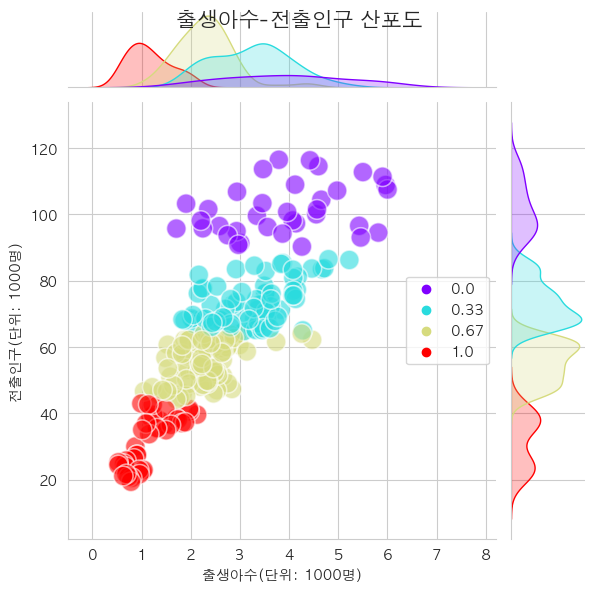

In [159]:
jointplotFun('출생아수', '전출인구')

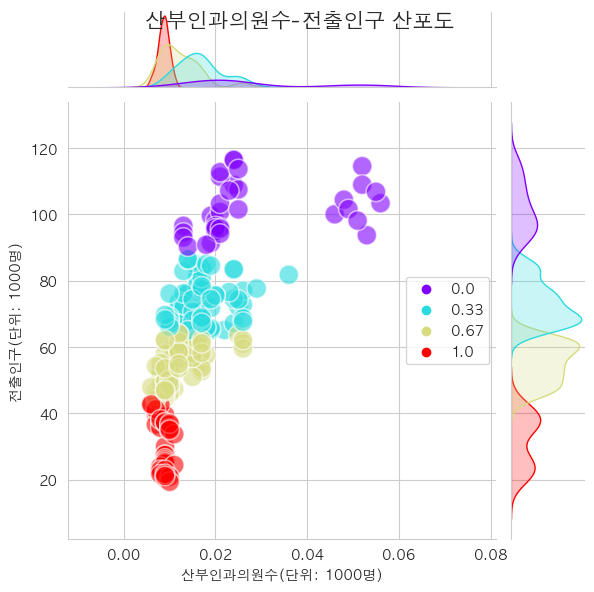

In [160]:
jointplotFun('산부인과의원수', '전출인구')

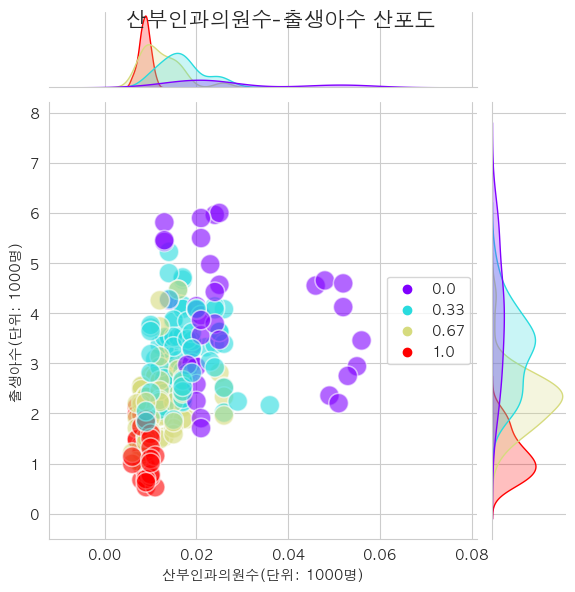

In [161]:
jointplotFun('산부인과의원수', '출생아수')

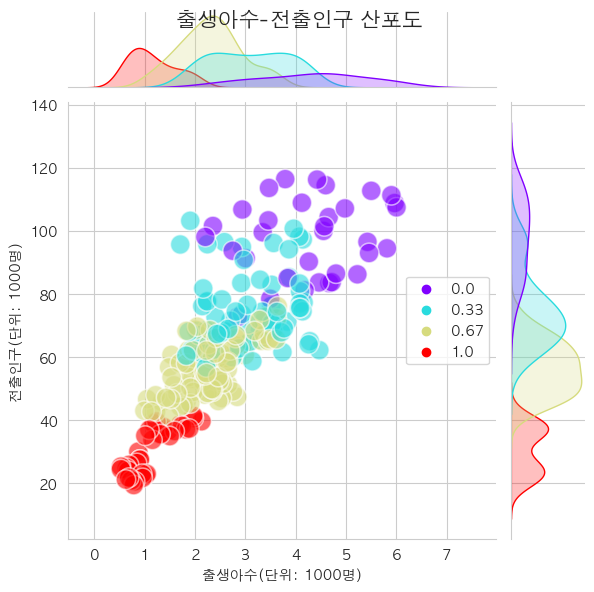

In [ ]:
# 조인트 그래프 - 산점도 (기본값)
j1 = sns.jointplot(
    x=df['출생아수']/1000,
    y=df['전출인구']/1000,
    data=df,
    hue="cluster_id",
    legend=True,
    palette='rainbow',
    s=200,
    alpha=0.6,
    # height=10, 
)
plt.xlabel("출생아수(단위: 1000명)")
plt.ylabel("전출인구(단위: 1000명)")

j1.fig.suptitle('출생아수-전출인구 산포도', size=15)
plt.legend(loc='right')
plt.show()

In [163]:
# Feature, Target
target_col = ['전출인구','출생아수','산부인과의원수']

data = df[target_col].to_numpy()
target = df['cluster_id'].to_numpy()

----
### 검증 세트 추가
- 훈련(60%), 검증(20%), 테스트(20%)

In [164]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = \
    train_test_split(data, target, test_size=0.2) # random_state=42,  stratify=target

In [165]:
sub_input, val_input, sub_target, val_target = \
    train_test_split(train_input, train_target, test_size=0.2) # random_state=42, stratify=train_target

In [166]:
# 세트 별 크기
print("Train :", sub_input.shape)
print("Valid :", val_input.shape)
print("Test  :", test_input.shape)

Train : (144, 3)
Valid : (36, 3)
Test  : (45, 3)


----

### 각 ML 별 Score 확인

In [167]:
# 각 ML별 import
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# 교차검증 import
from sklearn.model_selection import cross_validate
# 평균 절대값 오차
from sklearn.metrics import mean_absolute_error

# ml_list = [KNeighborsRegressor(n_neighbors=3), SVC(), GaussianProcessRegressor(), DecisionTreeRegressor(), RandomForestRegressor(), AdaBoostRegressor(), MLPRegressor(), GaussianNB(), QuadraticDiscriminantAnalysis()]
# ml_list = [GaussianProcessRegressor(), LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor(), AdaBoostRegressor(), MLPRegressor()]
ml_list = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor(), AdaBoostRegressor()]
for ml in ml_list:
    print("- ML Name :", ml)
    reg = ml
    # 학습
    reg.fit(sub_input, sub_target)
    # 정확도 판단
    print("+ Train score :", reg.score(sub_input, sub_target))
    print("+ Valid score :", reg.score(val_input, val_target))
    # 교차검증
    scores = cross_validate(reg, train_input, train_target)
    # 교차검증 후의 정확도 판단
    print("+ Test score :", np.mean(scores['test_score']))
    # 평균 절대값 오차
    test_prediction = ml.predict(test_input)
    mae = mean_absolute_error(test_target, test_prediction)
    print("+ Mean Absolute Error :", mae)
    print("-"*40)

- ML Name : LinearRegression()
+ Train score : 0.8908534204639769
+ Valid score : 0.9001011857855763
+ Test score : 0.8832902975611432
+ Mean Absolute Error : 0.07762667462251066
----------------------------------------
- ML Name : DecisionTreeRegressor()
+ Train score : 1.0
+ Valid score : 1.0
+ Test score : 1.0
+ Mean Absolute Error : 2.245117672019761e-16
----------------------------------------
- ML Name : RandomForestRegressor()
+ Train score : 0.9999708633943503
+ Valid score : 0.9958100324489958
+ Test score : 0.9998054975149074
+ Mean Absolute Error : 0.00015111111111170138
----------------------------------------
- ML Name : AdaBoostRegressor()
+ Train score : 1.0
+ Valid score : 1.0
+ Test score : 1.0
+ Mean Absolute Error : 2.911251486794855e-16
----------------------------------------


In [168]:
# LinearRegression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(sub_input, sub_target)

print("Train score :", lr.score(sub_input, sub_target))
print("Valid score :", lr.score(val_input, val_target))
print("Test score :", lr.score(test_input, test_target))

Train score : 0.8908534204639769
Valid score : 0.9001011857855763
Test score : 0.927183720299166


In [170]:
df.to_csv("../Data/seoul_2.csv", index=False)